## Network Science Coursework 1

Spring 2025

Due: February 10th, 1:00pm GMT

Please provide your CID number

CID: 02380481

In [1]:
# Do not modify this cell or import any other modules without explicit permission.
# You should run this cell before running the code below.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import scipy.sparse as sp

# Overview

In this assignment, we will study a **weighted, undirected network** representing co-authorships between scientists who posted preprints on the _Astrophysics E-Print Archive_ between January 1, 1995, and December 31, 1999 (*M. Newman, 2001*).

- Each node represents an author.  
- A **weighted edge** between two nodes represents the **number of papers** they co-authored together.  

You have been provided with a file (`data.gml`) containing the network data. Ensure that this file is stored in the **same directory** as your `.ipynb` notebook.  

The cell below loads the graph $g$ and verifies that the data is loaded correctly. The expected output is:

- **$N = 50$** (number of unique authors)
- **$L = 55$** (number of links)

In [4]:
g = nx.read_gml("data.gml")
N = g.number_of_nodes()
print(type(g))
print("N=",g.number_of_nodes())
print("L=",g.number_of_edges())

<class 'networkx.classes.graph.Graph'>
N= 50
L= 55


### Part 1: _Betweenness Centrality_ (7 points)
(a) The _betweenness centrality_ of node $i$ is defined as
$$b_i=\sum_{j\neq k\neq i}\frac{s_{i}(j,k|i)}{s(j,k)},$$
where $s(j,k)$ is the total number of shortest paths between nodes $j$ and $k$, and $s_{i}(j,k|i)$ is the number of shortest paths between nodes $j$ and $k$ that pass through $i$. 

Develop the function below **b_centrality** that inputs the graph $G$, and outputs the vector $\boldsymbol{b}$ as a NumPy array of length $N$, containing the betweeness centrality of each node in $G$, where $G$ is an unweighted, undirected, complete graph. 

You may use NetworkX shortest path functions ([documentation here](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html)) but you **cannot** use `nx.betweenness_centrality`.

Below the function, provide a 2-3 sentence explanation of the main
steps you have taken to make your code eﬀicient.

(b) Once your function is implemented test your code using `nx.betweenness_centrality`. Read the documentation carefully ([link here](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html)), since `nx.betweenness_centrality(G)` normalises the betweenness centrality by default, and it returns a **dictionary**, while your function should return an **array**.

To verify correctness, a small graph $G$ is provided below.

In [142]:
#Question 1

#Part A

def b_centrality(G):
    """
    Compute the betweenness centrality for a N-node graph G

    Input:
    G: The graph G
    
    Output:
    b: N-element numpy array containing the centrality vector

    Please do not modify the function input or the return statement below
    """
    N = G.number_of_nodes()
    b = np.zeros(N)

    for i in range(1,N+1):
        for j in range(1,N+1):
            if j!=i:
                for k in range(j+1,N+1):
                    if k!= i:
                        paths = [p for p in nx.all_shortest_paths(G,j,k)]
                        s_jk = len(paths)
                        s_jki = len([p for p in paths if i in p ])
                        if s_jk != 0:
                            b[i-1] += s_jki/s_jk

    return b


*Add brief discussion here on the steps taken to make your code efficient*

Answer: 

Despite the imbedded loops, I have taken the following steps to make this code efficeint:

1) I originally considered calculating s_jk outside of the loop for i, to avoid reptitive computations of the same value, however, since we require that j and k do not equal i, there is actaully a depedancy on i in this calculation. Hence it is best to be calculated within these loops.

2) Within the loops, I avoided calculating the valid paths twice by assigning its value to "path" as opposed to doing the following

                        s_jk = len([p for p in nx.all_shortest_paths(G,j,k)])
                        s_jki = len([p for p in nx.all_shortest_paths(G,j,k) if i in p ])



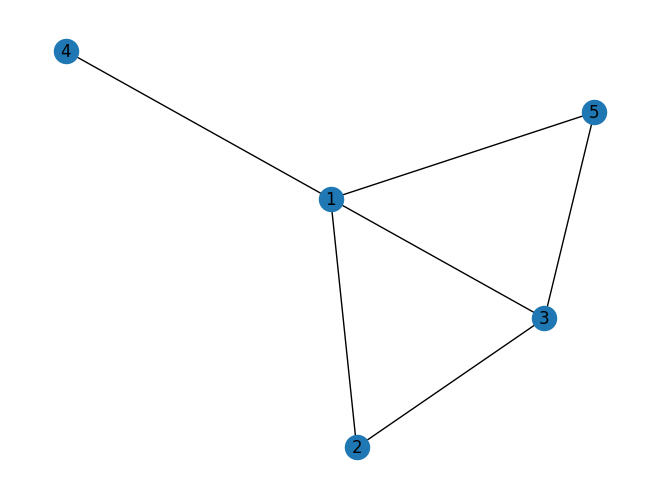

In [134]:
#Run this cell to compile a test graph G

G = nx.Graph()
G.add_edge(1, 5)
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(3, 5)
G.add_edge(3, 5)
G.add_edge(1, 4)
G.add_edge(2, 3)

plt.figure()
nx.draw(G,with_labels=True)
plt.show()


In [144]:
#Question 1

#Part B

#Converting NetworkX's Dictionary into an np.array sorted by its keys (sorting by increasing node index) 
nx_betweenness_dict = nx.betweenness_centrality(G, normalized = False)
nx_betweenness_array = np.array([nx_betweenness_dict[i] for i in sorted(nx_betweenness_dict.keys())])

print(f'My b_centrality: {b_centrality(G)}')
print(f'NetworkX b_centrality: {nx_betweenness_array}')

My b_centrality: [3.5 0.  0.5 0.  0. ]
NetworkX b_centrality: [3.5 0.  0.5 0.  0. ]


### Part 2: Centrality of the **data set** provided (graph $g$) (7 marks)

(a) Betweenness centrality calculation

Compute the *betweenness centrality* for both:
1. The **unweighted** graph $g$.
2. The **weighted** graph $g$.

Use the [`nx.betweenness_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html) function provided by NetworkX, not the code you have developed. 

(b) Katz centrality calculation

Use the [`nx.katz_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.katz_centrality.html) function to compute the *Katz centrality* for the **weighted** graph $g$.

- **Important**: You must find a sensible value of $\alpha$ to use in the calculation.

(c)  Comparing centralities

Examine your results for the centralities, by comparing (1) the unweighted betweenness centrality, (2) the weighted betweenness centrality and (3) the weighted Katz centrality. Add code to the cell below to support your comparison. You may find it useful to normalise the centralities to be between $0$ and $1$ by using the function **normalise** provided below. Provide a brief non-technical description of how much agreement there is between (1) and (2) and between (2) and (3), and discuss why some nodes may have higher or lower scores with different measures. Your code may generate 1-3 figures, or do something else that is comparably useful.

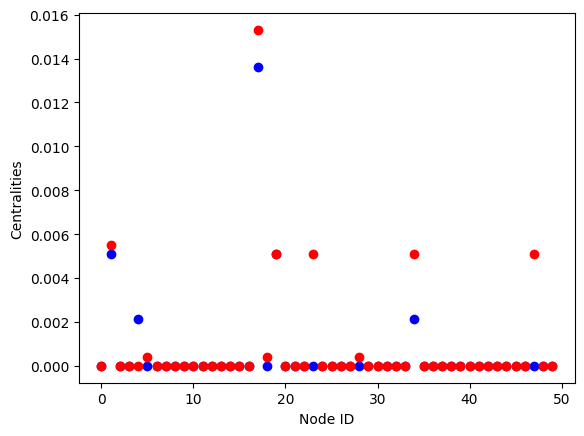

In [244]:
# Normalize function to scale values between 0 and 1
def normalise(values):
    min_val = np.min(values)
    max_val = np.max(values)
    return (values - min_val) / (max_val - min_val) if max_val > min_val else np.zeros_like(values)


#Question 2

#Part A

unweighted_between = nx.betweenness_centrality(g, weight = None)
weighted_between = nx.betweenness_centrality(g, weight = "weight")

#Finding Spectral Radius
gA = nx.adjacency_matrix(g)
lamb= (sp.linalg.eigs(gA, k=1, which = 'LM')[0]).real

#Alpha = 1/(2*lamb) < 1/lamb
my_alpha = (1/(2*lamb))

katz_centrality  = nx.katz_centrality(g, alpha = my_alpha, weight = "weight")

#print(f'The betweenness centrality of the unweighted graph: {unweighted_between}')
#print(f'The betweenness centrality of the weighted graph: {weighted_between}')
#print(f'The katz centrality of the weighted graph: {katz_centrality}')

x_vals = range(0, N)

y_unweight_vals = list(unweighted_between.values())
y_weight_vals = list(weighted_between.values())

plt.ylabel('Centralities')
plt.xlabel('Node ID')

plt.plot(x_vals, y_unweight_vals, 'bo')
plt.plot(x_vals, y_weight_vals, 'ro')

plt.show()

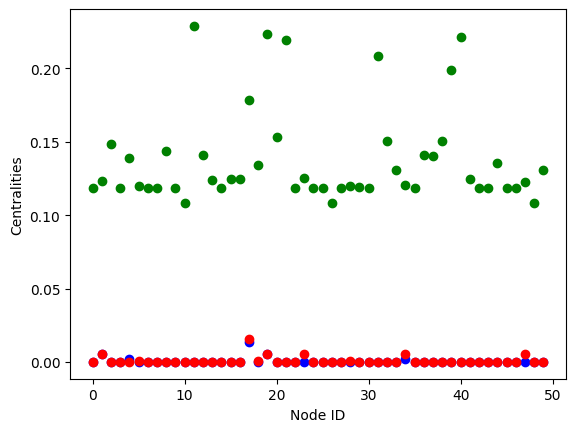

In [240]:
x_vals = range(0, N)

y_unweight_vals = list(unweighted_between.values())
y_weight_vals = list(weighted_between.values())
y_katz_vals = list(katz_centrality.values())

plt.ylabel('Centralities')
plt.xlabel('Node ID')

plt.plot(x_vals, y_unweight_vals, 'bo')
plt.plot(x_vals, y_weight_vals, 'ro')
plt.plot(x_vals, y_katz_vals, 'go')

plt.show()

*Add brief discussion here*

### Part 3: Identifying hubs (6 points)
(a) The _betweenness centrality_ and _Katz centrality_ help to identify hubs. What properties would we expect hubs to exhibit when using these techniques?

(b) If a hub is identified in graph $g$ using these techniques, what does this represent physically? How does this interpretation change when considering the weighted graph versus the unweighted graph?

*Add brief discussion here*

### Further guidance

* You should submit both a completed ipynb file (Jupiter notebook) and a pdf version of the notebook file (generated using File --- Download as in notebook). If you cannot generate a pdf, try installing latex first, or submit an html version instead. Create a zip file containing both. 
    To submit your assignment, go to the _Assessments and Mark Schemes_ folder in the _Course Content_ on the Blackboard. Upload your PDF and ZIP file into _Coursework 1 Drop Box Spring 25_. All files should be named *coursework1_CID.ipynb*, *coursework1_CID.pdf* and *coursework1_CID.zip*,  where CID is your CID number). 
* You may use numpy, scipy, and matplotlib as needed. You may use networkx as needed **except** the beteweenness_centrality function in Part 1 (a). Please do not use any other packages without explicit permission.
* Marking will be based on the correctness of your work, the efficiency of your codes, and the degree to which your submission reflects a good understanding of the material covered up to the release of this assignment. 
* This assignment requires sensible time-management on your part. Do not spend so much time on this assignment that it interferes substantially with your other modules. If you are concerned that your approach to the assignment may require an excessive amount of time, please get in touch with the instructor. 
* Questions about the assignment should be asked in private settings. This can be a "private" question on Ed (which is distinct from "anonymous"), asking for a one-on-one meeting during office hours, or during a problem class.
* Please regularly backup your work. For example, you could keep an updated copy of your notebook on OneDrive.
* In order to assign partial credit, we need to understand what your code is doing, so please add comments to the code to help us.
* It may be helpful to initally develop your code in a Python module (outside of a function) and run it in a qtconsole (or similar Python terminal) so that you can readily access the values of the variables you are using.
* Feel free to use/modify codes that I have provided during the term.
